In [32]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# def laplacian_of_gaussian(image, sigma):
#     """Apply Laplacian of Gaussian (LoG) filter."""
#     # Create Gaussian kernel
#     size = int(2 * np.ceil(3 * sigma) + 1)  # kernel size
#     gaussian_kernel = cv.getGaussianKernel(size, sigma)
#     gaussian_kernel = gaussian_kernel @ gaussian_kernel.T  # 2D kernel
#     log_kernel = cv.Laplacian(gaussian_kernel, cv.CV_64F)
#     filtered_image = cv.filter2D(image, cv.CV_64F, log_kernel)
#     return filtered_image

def laplacian_of_gaussian(sigma: float) -> np.ndarray:

    size = int(2 * np.ceil(3 * sigma) + 1)
        
    # Create a grid of (x, y) coordinates
    ax = np.linspace(-(size // 2), size // 2, size)
    x, y = np.meshgrid(ax, ax)

    # Compute the Laplacian of Gaussian
    laplacian = (x**2 + y**2 - 2 * sigma**2) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

    # Normalize the LoG kernel
    # Plot in 3-D
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # ax.plot_surface(x, y, laplacian, cmap='coolwarm')
    # ax.set_title('2D Gaussian Kernel')
    # ax.set_xlabel('X-axis')
    # ax.set_ylabel('Y-axis')
    # ax.set_zlabel('G(X,Y)')
    # plt.show()
    
    return laplacian 

In [34]:
print(laplacian_of_gaussian(3))

[[ 1.77710118e-02  4.03014243e-02  8.17799356e-02  1.48840480e-01
   2.43764649e-01  3.60796556e-01  4.85132184e-01  5.95991065e-01
   6.72554270e-01  6.99866782e-01  6.72554270e-01  5.95991065e-01
   4.85132184e-01  3.60796556e-01  2.43764649e-01  1.48840480e-01
   8.17799356e-02  4.03014243e-02  1.77710118e-02]
 [ 4.03014243e-02  8.97586619e-02  1.78368992e-01  3.17005451e-01
   5.05723821e-01  7.28104964e-01  9.52921862e-01  1.14367325e+00
   1.27002488e+00  1.31401304e+00  1.27002488e+00  1.14367325e+00
   9.52921862e-01  7.28104964e-01  5.05723821e-01  3.17005451e-01
   1.78368992e-01  8.97586619e-02  4.03014243e-02]
 [ 8.17799356e-02  1.78368992e-01  3.45619158e-01  5.95991065e-01
   9.17815012e-01  1.27002488e+00  1.59465471e+00  1.84209520e+00
   1.98964877e+00  2.03758439e+00  1.98964877e+00  1.84209520e+00
   1.59465471e+00  1.27002488e+00  9.17815012e-01  5.95991065e-01
   3.45619158e-01  1.78368992e-01  8.17799356e-02]
 [ 1.48840480e-01  3.17005451e-01  5.95991065e-01  9.89

In [41]:
def find_scale_space_extrema(image, sigmas):
    """Detect circles by finding extrema in the scale-space."""
    # Store results
    detected_circles = []
    
    # Loop through different sigma values
    for sigma in sigmas:
        laplacian_kernel = laplacian_of_gaussian(sigma)

        filtered_image = cv.filter2D(image, cv.CV_64F, laplacian_kernel)

        # plt.figure(figsize=(10, 5))
        # plt.subplot(1, 2, 1)
        # plt.title('filtered_image')
        # plt.imshow(filtered_image)
        # plt.axis('off')


        
        # Normalize the filtered image
        filtered_image = cv.normalize(filtered_image, None, 0, 255, cv.NORM_MINMAX)

        # plt.subplot(1, 2, 1)
        # plt.title('filtered_image')
        # plt.imshow(filtered_image)
        # plt.axis('off')
        
        

        # Threshold to find strong responses
        # Use Otsu's method to find the optimal threshold
        _, thresh_image = cv.threshold(np.uint8(filtered_image), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)


        # plt.figure(figsize=(10, 5))
        # plt.subplot(1, 2, 1)
        # plt.title('thresh_image')
        # plt.imshow(thresh_image)
        # plt.axis('off')
        # plt.show()
        
        # Find contours in the thresholded image
        contours, _ = cv.findContours(thresh_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)


        
        # Iterate through contours to find circles
        for contour in contours:
            if len(contour) >= 5:  # Need at least 5 points to fit a circle
                (x, y), radius = cv.minEnclosingCircle(contour)
                detected_circles.append((int(x), int(y), int(radius), sigma))
    print("Hello")            
    print(detected_circles)            
    
    return detected_circles

Hello
[(343, 347, 3, 0.5), (127, 349, 6, 0.5), (352, 350, 10, 0.5), (358, 339, 2, 0.5), (3, 276, 11, 0.5), (9, 263, 1, 0.5), (4, 246, 9, 0.5), (344, 229, 5, 0.5), (324, 223, 6, 0.5), (23, 217, 3, 0.5), (317, 213, 3, 0.5), (305, 214, 4, 0.5), (310, 207, 2, 0.5), (322, 206, 4, 0.5), (315, 204, 3, 0.5), (348, 203, 2, 0.5), (7, 199, 1, 0.5), (333, 194, 1, 0.5), (325, 194, 1, 0.5), (2, 195, 2, 0.5), (21, 191, 2, 0.5), (329, 189, 1, 0.5), (16, 187, 2, 0.5), (346, 184, 1, 0.5), (179, 256, 206, 0.5), (358, 146, 4, 0.5), (39, 28, 2, 0.5), (45, 27, 2, 0.5), (34, 27, 1, 0.5), (29, 27, 2, 0.5), (180, 24, 2, 0.5), (191, 22, 3, 0.5), (194, 16, 2, 0.5), (202, 12, 1, 0.5), (180, 10, 2, 0.5), (337, 357, 1, 0.6), (123, 357, 1, 0.6), (116, 357, 3, 0.6), (340, 356, 2, 0.6), (189, 354, 1, 0.6), (98, 356, 7, 0.6), (3, 356, 2, 0.6), (296, 355, 3, 0.6), (205, 356, 3, 0.6), (192, 356, 3, 0.6), (302, 354, 2, 0.6), (162, 355, 8, 0.6), (88, 352, 1, 0.6), (270, 354, 4, 0.6), (350, 352, 4, 0.6), (198, 350, 3, 0.6),

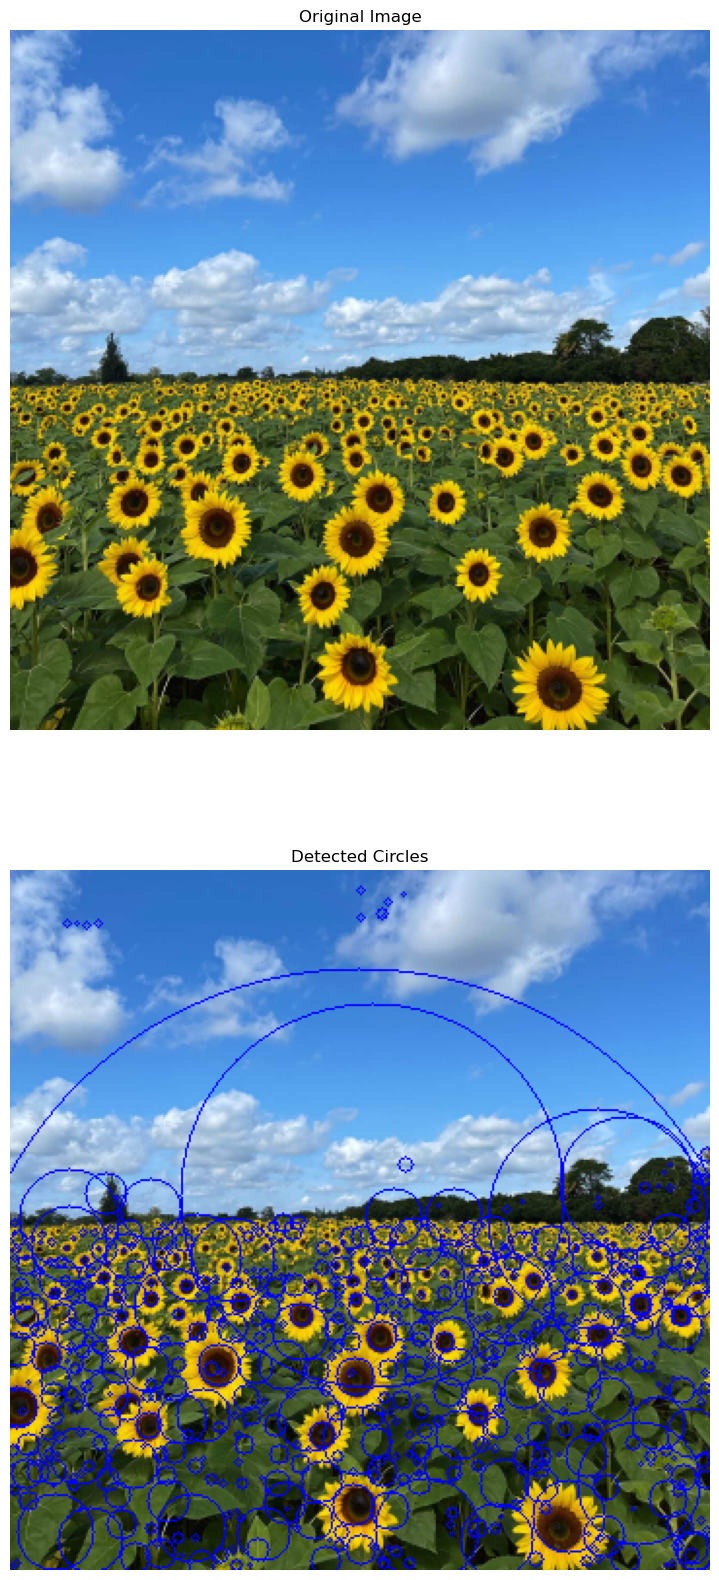

Range of sigma values used: 0.5 to 0.6


In [43]:
# Load the image
im = cv.imread('../images/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
if im is None:
    raise FileNotFoundError("Image not found. Please check the file path.")

# Convert to grayscale
gray_im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Define the range of sigma values
sigmas = np.linspace(0.5, 0.6, 2)  # You can adjust the range and number of values

# Find circles in the image
detected_circles = find_scale_space_extrema(gray_im, sigmas)

# Report the parameters of the largest circles
largest_circles = sorted(detected_circles, key=lambda x: x[2], reverse=True)[:5]  # Get the largest 5 circles

print("Parameters of the largest circles (x, y, radius, sigma):")
for circle in largest_circles:
    print(circle)

# Draw the detected circles
output_image = im.copy()
for (x, y, radius, sigma) in detected_circles:
    cv.circle(output_image, (x, y), radius, (255, 0, 0), 1)
    

# Display the original image and the output image
plt.figure(figsize=(20, 20))
plt.subplot(2, 1, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 1, 2)
plt.title('Detected Circles')
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

# Report the range of sigma values used
print(f"Range of sigma values used: {sigmas[0]} to {sigmas[-1]}")